In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\input_layer_4_6_12_3.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\output_layer_4_6_12_3.pickle','rb') as file:
    output_data = pickle.load(file)
print(output_data.shape)
#output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)
(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/100
100000/100000 - 3s - loss: 0.3013 - accuracy: 0.8756 - val_loss: 0.2300 - val_accuracy: 0.9065
Epoch 2/100
100000/100000 - 2s - loss: 0.2192 - accuracy: 0.9101 - val_loss: 0.2150 - val_accuracy: 0.9109
Epoch 3/100
100000/100000 - 2s - loss: 0.2094 - accuracy: 0.9118 - val_loss: 0.2085 - val_accuracy: 0.9117
Epoch 4/100
100000/100000 - 2s - loss: 0.2011 - accuracy: 0.9135 - val_loss: 0.2013 - val_accuracy: 0.9141
Epoch 5/100
100000/100000 - 2s - loss: 0.1913 - accuracy: 0.9178 - val_loss: 0.1893 - val_accuracy: 0.9193
Epoch 6/100
100000/100000 - 2s - loss: 0.1766 - accuracy: 0.9244 - val_loss: 0.1739 - val_accuracy: 0.9254
Epoch 7/100
100000/100000 - 2s - loss: 0.1575 - accuracy: 0.9305 - val_loss: 0.1491 - val_accuracy: 0.9329
Epoch 8/100
100000/100000 - 2s - loss: 0.1418 - accuracy: 0.9352 - val_loss: 0.1390 - val_accuracy: 0.9369
Epoch 9/100
100000/100000 - 2s - loss: 0.1293 - accuracy: 0.9400 - val_loss: 0.1318 - val_accu

Epoch 77/100
100000/100000 - 2s - loss: 0.0220 - accuracy: 0.9920 - val_loss: 0.0705 - val_accuracy: 0.9815
Epoch 78/100
100000/100000 - 2s - loss: 0.0247 - accuracy: 0.9911 - val_loss: 0.0677 - val_accuracy: 0.9808
Epoch 79/100
100000/100000 - 2s - loss: 0.0232 - accuracy: 0.9915 - val_loss: 0.0681 - val_accuracy: 0.9822
Epoch 80/100
100000/100000 - 2s - loss: 0.0225 - accuracy: 0.9919 - val_loss: 0.0705 - val_accuracy: 0.9809
Epoch 81/100
100000/100000 - 2s - loss: 0.0232 - accuracy: 0.9916 - val_loss: 0.0617 - val_accuracy: 0.9842
Epoch 82/100
100000/100000 - 2s - loss: 0.0201 - accuracy: 0.9927 - val_loss: 0.0643 - val_accuracy: 0.9823
Epoch 83/100
100000/100000 - 2s - loss: 0.0210 - accuracy: 0.9923 - val_loss: 0.0662 - val_accuracy: 0.9829
Epoch 84/100
100000/100000 - 2s - loss: 0.0211 - accuracy: 0.9925 - val_loss: 0.0643 - val_accuracy: 0.9822
Epoch 85/100
100000/100000 - 2s - loss: 0.0257 - accuracy: 0.9908 - val_loss: 0.0715 - val_accuracy: 0.9809
Epoch 86/100
100000/100000 -

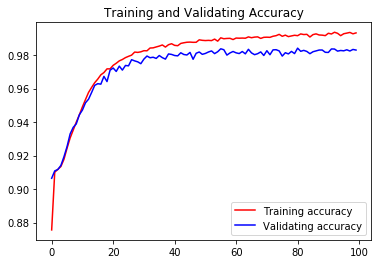

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Better_of_Two\\Better_of_Two_4_6_12_3_model.h5')